<a href="https://colab.research.google.com/github/tas-anne/machine-Learning-Labtask/blob/main/190041220__Lab_04_Introduction_to_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Dataset Description
Since this is an introductory article, the problem that we are going to solve is pretty simple. Suppose we have some information about obesity, smoking habits, and exercise habits of five people. We also know whether these people are diabetic or not. Our dataset looks like this.

In [ ]:
import pandas as pd
import numpy as np

!gdown --id -q 1EJmU7Mli1oXLPJfXGrus0HHfVnXM6wpk
!unzip -q Data.zip

data = pd.read_csv('Data.csv')
data.head()

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(


,Person,Smoking,Obesity,Exercise,Diabetic
0,Person 1,0,1,0,1
1,Person 2,0,0,1,0
2,Person 3,1,0,0,0
3,Person 4,1,1,0,1
4,Person 5,1,1,1,1


In the above table, we have five columns: Person, Smoking, Obesity, Exercise, and Diabetic. Here 1 refers to true and 0 refers to false. For instance, the first person has values of 0, 1, 0 which means that the person doesn't smoke, is obese, and doesn't exercise. The person is also diabetic.

It is clearly evident from the dataset that a person's obesity is indicative of him being diabetic. Our task is to create a neural network that is able to predict whether an unknown person is diabetic or not from the given data about his exercise habits, obesity, and smoking habits. This is a type of supervised learning problem where we are given inputs and corresponding correct outputs and our task is to find the mapping between the inputs and the outputs.

**Note**: This is just a fictional dataset, in real life, obese people are not necessarily always diabetic.

# The Solution
We will create a very simple neural network with one input layer, one hidden layer (that will contain two hidden units) and one output layer. Before writing any actual code, let's first let's see how our neural network will execute, in theory. For simplicity, we are not considering the bias term.<br>
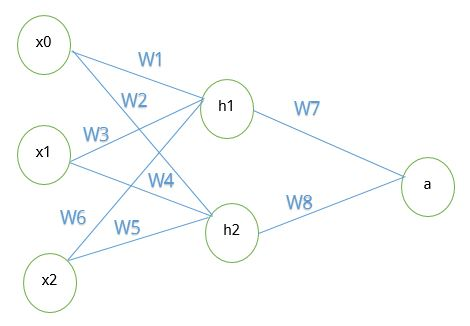



### Separating feature values from labels

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

print(f'X:\n {X}')
print(f'y:\n {y}')

X:
 [[0 1 0]
 [0 0 1]
 [1 0 0]
 [1 1 0]
 [1 1 1]]
y:
 [[1]
 [0]
 [0]
 [1]
 [1]]


### Weight Initialization
At first, we will consider random weights. We will store the weights values for input layer and hidden layer in matrix `w1`. Weight values for hidden layer and output layer will be stored in matrix `w2`.<br>
Since, there are 3 input units and 2 hidden units, the dimension of matrix `w1` will be 3 × 2. For the same reason, dimension of matrix `w2` will be 2 × 1.

In [ ]:



w1 = np.random.random((3,2))
w2 = np.random.random((2,1))

print(f'w1:\n {w1}')
print(f'w2:\n {w2}')

w1:
 [[0.25351361 0.54916915]
 [0.06127527 0.10144115]
 [0.48329983 0.19271182]]
w2:
 [[0.45114143]
 [0.50423444]]


## Forward Propagation
At first, we will calculate the weighted sum by multiplying `X` with `w1`. Let this result be $z_{h}$.<br>
$$z_h = \sum_{i=1}^{X} x_iw_{1_i}$$

In [ ]:
z_h=np.matmul(X,w1)
print(f'z_h:\n {z_h}')

z_h:
 [[0.06127527296644453 0.10144115312244084]
 [0.48329982528797444 0.19271181979685326]
 [0.2535136063856489 0.5491691523326706]
 [0.31478887935209343 0.6506103054551114]
 [0.7980887046400679 0.8433221252519647]]


$z_{h}$ is the value of hidden layer. To keep this value between 0 and 1, we will pass it through a `sigmoid` function and calculate `a_h`.<br>
$$sigmoid = \frac{1}{1+_e{-x}}$$

In [ ]:
import numpy as np

In [ ]:
def sigmoid(x):
    x=np.array(x,dtype='int')
    return 1.0 / (1.0 + np.exp(-1.0 * x))

In [ ]:
a_h = sigmoid(z_h)
print(f'a_h:\n {a_h}')

a_h:
 [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


Now we'll calculate the value of output layer by multiplying the value of hidden layer `a_h` with `w2`. Then, we'll pass the resultant value through a sigmoid function which in turn will return us the final value `a_o`.<br>
$$z_o = \sum_{i=1}^{} a_{h_i}w_{2_i}$$<br>
$$a_o = sigmoid(z_o)$$


In [ ]:
z_o=np.matmul(a_h,w2)
a_o=sigmoid(z_o)
print(f'a_o:\n {a_o}')

a_o:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]


But, this is not our final output. We'll calculate the `error` from the difference between our ground truth `y` and `a_o`.<br>
$$error, E_{a_o} = \frac{1}{2} (a_o-y)^2$$

In [ ]:
p=(a_o-y)*(a_o-y)
error = (0.5*p)
print(f'error:\n {error}')

error:
 [[0.125]
 [0.125]
 [0.125]
 [0.125]
 [0.125]]


## Back Propagation

### Updating `w2`
Back Propagation will start now. This means that in order to minimize the error that we have received, we will repeatedly update the weights of the `w1` and `w2` matrix back from the output layer and calculate the error. In this way we can reduce the error a lot at a time and predict the value which will be closer to the actual output.<br>

So first we will find out how much change in the weights of `w2` will reduce our error. We will deduct the value of $\frac {dE_{a_o}}{dw_2}$ from $w_2$.<br>
$$w_2 = w_2 - learningRate×\frac{dEa_o}{dw_2}$$.<br>
From the chain rule of calculus, we can calculate the value of $\frac {dE_{a_o}}{dw_2}$ as follows,<br>

$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{dw_2} = \frac {dE_{a_o}}{da_o} × \frac {d{a_o}}{dz_o} × \frac {d_{z_o}}{dw_2}$$<br>
$$\frac {dE_{a_o}}{da_o} = \frac{d}{da_o}(\frac{1}{2} (a_o-y)^2)=a_o-y$$<br>


In [ ]:
dEdao = a_o-y
print(f'dEdao:\n {dEdao}')

dEdao:
 [[-0.5]
 [0.5]
 [0.5]
 [-0.5]
 [-0.5]]


Now, the second therm which is needed to calculate $\frac {dE_{a_o}}{dw_2}$ is basically the derivative of the `sigmoid` function.<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}(\frac{1}{1+_e{-z_o}})$<br>
$\frac{da_o}{dz_o} = \frac{d}{dz_o}({1+_e{-z_o}})^{-1}$<br>
$\frac{da_o}{dz_o} = (-1)({1+_e{-z_o}})^{-2}(-e^{-z_o})$<br>
....<br>....<br>
$\frac{da_o}{dz_o} =\frac{1}{1+_e{-z_o}}×(1-\frac{1}{1+_e{-z_o}}) = sigmoid(z_o)×(1-sigmoid(z_o))=a_o×(1-a_o)$

In [ ]:
def sigmoid_derivative(x):
    return x*(1-x)
daozo = sigmoid_derivative(a_o)
print(f'daozo:\n {daozo}')

daozo:
 [[0.25]
 [0.25]
 [0.25]
 [0.25]
 [0.25]]


The last term,<br>
$$\frac{dz_o}{dw_2} = \frac{d}{dw_2}(a_h×w_2) = a_h$$<br>
Now, we have all the necessary information to calculate $\frac {dE_{a_o}}{dw_2}$

In [ ]:
dEdw2 = np.matmul(a_h.T,(dEdao * daozo))
print(f'dEdw2:\n {dEdw2}')

dEdw2:
 [[-0.0625]
 [-0.0625]]


Now, we'll update the weight values of `w2` by subtracting $\frac{dEa_o}{dw_2}$ from `w2`. But, for faster convergence, we'll multiply $\frac{dEa_o}{dw_2}$ by `learning_rate = 3`.

In [ ]:
learning_rate = 3
w2 = w2 - (learning_rate * dEdw2)
print(f'w2:\n {w2}')

w2:
 [[0.6386414262229456]
 [0.6917344447265131]]


### Updating `w1`
Now we will go one more step backward. The updated value of `w1` will be, $$w_1 = w_1 - learningRate×\frac{dEa_o}{dw_1}$$.<br>
Now, using chain rule as before, we will calculate the value of $\frac{dEa_o}{dw_1}$.<br>


$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{dz_h}×\frac{dz_h}{dw_1}$$
$$\frac{dEa_o}{dw_1} = \frac{dEa_o}{da_h}×\frac{da_h}{dz_h}×\frac{dz_h}{dw_1}$$
Since, there is no direct relationship between $dEa_o$ and $da_h$, we have to break them again using chain rule as follows.
$$\frac{dEa_o}{da_h} = \frac{dEa_o}{dz_o}×\frac{dz_o}{da_h} = \frac{dEa_o}{da_o}×\frac{da_o}{dz_o}×\frac{dz_o}{da_h}$$
But, we have already calculated the value of $\frac{dEa_o}{da_o}×\frac{da_o}{dz_o}$ while updating `w2`. So,
$$\frac{dz_o}{da_h} = \frac{d}{da_h}(a_h×w_2) = w_2$$

In [ ]:
dEdzo = (dEdao * daozo)
dEdah = np.matmul(dEdzo, w2.T)
print(f'dEdah:\n {dEdah}')

dEdah:
 [[-0.0798301782778682 -0.08646680559081414]
 [0.0798301782778682 0.08646680559081414]
 [0.0798301782778682 0.08646680559081414]
 [-0.0798301782778682 -0.08646680559081414]
 [-0.0798301782778682 -0.08646680559081414]]


We have successfully calculated the value of $\frac{dEa_o}{da_h}$. As it is the derivative of sigmoid, $$\frac{da_h}{dz_h} = a_h\times(1-a_h)$$

In [ ]:
dahdzh = sigmoid_derivative(a_h)
print(f'dahdzh:\n {dahdzh}')

dahdzh:
 [[0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]]


Now, for the last term to calculate $\frac{dEa_o}{dw_1}$,$$\frac{dz_h}{dw_1} = \frac{d}{dw_1}(X×w_1) = X$$

In [ ]:
dEdw1 = np.matmul(X.T, (dEdah * dahdzh)) 
print(f'dEdw1:\n {dEdw1}')

dEdw1:
 [[-0.01995754456946705 -0.021616701397703535]
 [-0.05987263370840115 -0.0648501041931106]
 [0.0 0.0]]


Now, we'll update the weight values of `w1` by subtracting $\frac{dEa_o}{dw_1}$ from `w1`.

In [ ]:
w1 = w1 - (learning_rate * dEdw1)
print(f'w1:\n {w1}')

w1:
 [[0.31338624009405003 0.6140192565257812]
 [0.24089317409164798 0.29599146570177265]
 [0.48329982528797444 0.19271181979685326]]


# Prediction

In [ ]:
def predict(X,w1,w2):
    return sigmoid(np.matmul(sigmoid(np.matmul(X,w1)),w2))#output first hiddenlayer*w2

In [ ]:
prediction = predict(X,w1,w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

prediction probabilities:
 [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
prediction:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


# Training
Let's run for 500 epochs and check whether the loss decreases or not. In the mean time, the prediction should get better.

In [ ]:
data_np = data.to_numpy()
X = data_np[:,[1,2,3]]
y = data_np[:,4]
y = np.atleast_2d(y).T

w1 = np.random.random((3,2))
w2 = np.random.random((2,1))

epochs = 50
learning_rate = 3

for i in range(0, epochs):
    
    # forward prop
    z_h=np.matmul(X,w1)
    a_h = sigmoid(z_h)
    z_o=np.matmul(a_h,w2)
    a_o=sigmoid(z_o)
    error = (0.5*(np.power((a_o-y),2)))
    print(f'error in epoch {i+1}: {np.sum(error)}')

    # backprop
    dEdao = a_o-y
    daozo = a_o*(1-a_o)
    dEdw2 = np.matmul(a_h.T,(dEdao * daozo))
    learning_rate = 3
    w2 = w2 - (learning_rate * dEdw2)

    dEdzo = (dEdao * daozo)
    dEdah =  np.matmul(dEdzo, w2.T)
    dahdzh = sigmoid_derivative(a_h)
    dEdw1 = np.matmul(X.T, (dEdah * dahdzh)) 
    w1 = w1 - (learning_rate * dEdw1)

prediction = predict(X, w1, w2)

print(f'prediction probabilities:\n {prediction}')
print(f'prediction:\n {np.round(prediction)}')

error in epoch 1: 0.625
error in epoch 2: 0.44732948812851325
error in epoch 3: 0.44732948812851325
error in epoch 4: 0.3584942321927699
error in epoch 5: 0.3584942321927699
error in epoch 6: 0.3584942321927699
error in epoch 7: 0.3584942321927699
error in epoch 8: 0.5361647440642566
error in epoch 9: 0.3584942321927699
error in epoch 10: 0.3584942321927699
error in epoch 11: 0.3584942321927699
error in epoch 12: 0.3584942321927699
error in epoch 13: 0.44732948812851325
error in epoch 14: 0.3584942321927699
error in epoch 15: 0.3584942321927699
error in epoch 16: 0.44732948812851325
error in epoch 17: 0.3584942321927699
error in epoch 18: 0.3584942321927699
error in epoch 19: 0.3584942321927699
error in epoch 20: 0.3584942321927699
error in epoch 21: 0.3584942321927699
error in epoch 22: 0.3584942321927699
error in epoch 23: 0.3294341564378188
error in epoch 24: 0.3294341564378188
error in epoch 25: 0.30037408068286775
error in epoch 26: 0.3003740806828677
error in epoch 27: 0.38920933

### Tasks
1. Implement a neural network model to classify if a Apple leaf is healthy or not. The dataset can be using the [iPython notebook that was provided in the last lab](https://colab.research.google.com/drive/1_um93xoAuHTZaNFy9kuLPeaa4gRLq7W_?usp=sharing). Your neural network model should contain a **single** hidden layer with as many neurons as you want. For this task, use of any libraries other than `numpy` and `pandas` is prohibited. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch.

1. Implement a neural network model to classify three categories of Apple leaf disease using **Keras** library from python. Your neural network model should contain **multiple** hidden layers with as many neurons as you want. For this task, use of any library is permissible. Your training, validation and test set should have a ratio of 60:20:20. Finally, show the `accuracy` score along with two graphs - training & validation accuracy vs epoch, training & validation loss vs epoch. This [link](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/) might help you implementing a neural network with **Keras**.

1. For the task `2`, experiment with different number of hidden layers (*2, 4, 6*) to increase the accuracy score. Also show the effect of followings on overall performance: **different activation function (*relu, sigmoid, tanh*) for layers**, **different optimizers (*Adam, Adagrad, Adadelta*)**, and **various learning rates (*1, 0.1, 0.01*)**.
<br>
<br>
*N.B.: Any additional experiment (such as, Early Stopping) with justification or training insights will contain bonus points.*
    

### Solution: Task - 1

In [ ]:
# Codes for Task 1
import os
import cv2
import glob
import matplotlib.pyplot as plt
import shutil
from sklearn.metrics import accuracy_score

!curl -L -o 'apple.zip' 'https://drive.google.com/u/0/uc?id=1WZDAdKXdA1uKM6tl-dCWGUk7Um1EiEUO&export=download&confirm=t'
shutil.unpack_archive("/content/apple.zip", "/content/apple")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 36.3M  100 36.3M    0     0  22.6M      0  0:00:01  0:00:01 --:--:--  198M


In [ ]:
files = glob.glob('apple/*/*')
print(files[0])

apple/Apple___healthy/image (728).JPG


In [ ]:
X = []
y = []
for f in files:
  img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1)
  img = np.reshape(img, newshape=(676,))
  X.append(img)
  if "Black_rot" in f:
    y.append(0.)
  elif "Cedar_apple_rust" in f:
    y.append(0.)
  elif "healthy" in f:
    y.append(1.)
X = np.array(X)
y = np.array(y)
X.shape

(2541, 676)

In [ ]:
y = np.reshape(y, newshape=(2541, 1))
y.shape

(2541, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 69)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.2, random_state = 69)
X_train.shape

(1524, 676)

In [ ]:

class NeuralNetwork:
  def __init__(self, lr = 0.01, n_iters = 1000, h_units = 700):
    self.w1 = None
    self.w2 = None
    self.lr = lr
    self.n_iters = n_iters
    self.h_units = h_units
    
  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X_train, y_train, X_test, y_test):
    n_samples, n_features = X_train.shape
    self.w1 = np.random.random((n_features, self.h_units))
    self.w2 = np.random.random((self.h_units, 1))

    self.errors_train = []
    self.accuracy_train = []
    self.errors_test = []
    self.accuracy_test = []

    for i in range(0, self.n_iters):
        
      # forward prop
      z_h = np.matmul(X_train,self.w1)
      a_h = sigmoid(z_h)
      z_o = np.matmul(a_h,self.w2)
      a_o = sigmoid(z_o)
      
      error_train = np.mean(0.5*(np.power((a_o-y_train),2)))
      self.errors_train.append(error_train)
      self.accuracy_train.append(accuracy_score(y_train, self.predict(X_train)))

      if (i+1)%100 == 0:
        print(f'error in epoch {i+1}: {np.sum(error_train)}')
      
      z_h_test = np.matmul(X_test,self.w1)
      a_h_test = sigmoid(z_h_test)
      z_o_test = np.matmul(a_h_test,self.w2)
      a_o_test = sigmoid(z_o_test)

      error_test = np.mean(0.5*(np.power((a_o_test-y_test),2)))
      self.errors_test.append(error_test)
      self.accuracy_test.append(accuracy_score(y_test, self.predict(X_test)))

      # backprop
      dEdao = a_o - y_train
      daozo = sigmoid_derivative(a_o)
      dEdzo = dEdao * daozo
      dEdw2 = np.matmul(a_h.T, dEdzo)
      self.w2 = self.w2 - self.lr * dEdw2

      dEdah = np.matmul(dEdzo, self.w2.T)
      dahdzh = sigmoid_derivative(a_h)
      dEdzh = dEdah * dahdzh
      dEdw1 = np.matmul(X_train.T, dEdzh)
      self.w1 = self.w1 - self.lr * dEdw1


  def predict(self, X):
    z_h = np.matmul(X,self.w1)
    a_h = sigmoid(z_h)
    z_o = np.matmul(a_h,self.w2)
    a_o = sigmoid(z_o)
    return np.round(a_o)

  def plot_error(self):
    iters = np.arange(0, self.n_iters)
    fig = plt.figure(figsize=(8, 6))
    plt.plot(iters, self.errors_train, color='b')
    plt.plot(iters, self.errors_test, color='r')
    plt.xlabel("Iterations")
    plt.ylabel("Error")
    plt.show()

  def plot_accuracy(self):
    iters = np.arange(0, self.n_iters)
    fig = plt.figure(figsize=(8, 6))
    plt.plot(iters, self.accuracy_train, color='b')
    plt.plot(iters, self.accuracy_test, color='r')
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy Score")
    plt.show()


In [ ]:
model = NeuralNetwork(lr = .001, h_units=700)
model.fit(X_train, y_train, X_val, y_val)
y_hat = model.predict(X_test)


error in epoch 100: 0.17913385826771652
error in epoch 200: 0.17913385826771652
error in epoch 300: 0.17913385826771652
error in epoch 400: 0.17913385826771652
error in epoch 500: 0.17913385826771652
error in epoch 600: 0.17913385826771652
error in epoch 700: 0.17913385826771652
error in epoch 800: 0.17913385826771652
error in epoch 900: 0.17913385826771652
error in epoch 1000: 0.17913385826771652


In [ ]:
error = np.sum(np.power(y_hat-y_test, 2))
print(f"Error = {error}")

Error = 279.0


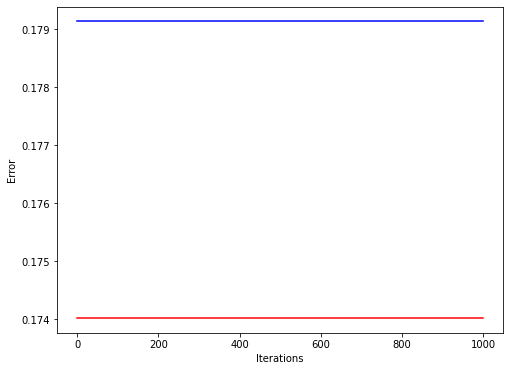

In [ ]:
model.plot_error()

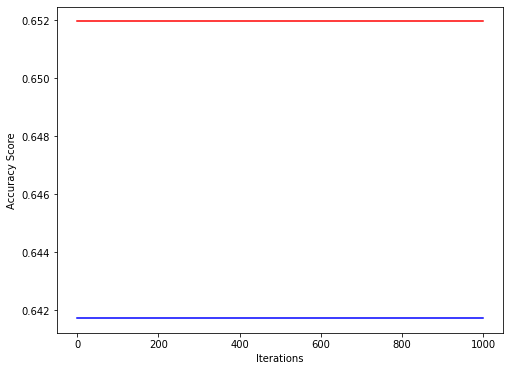

In [ ]:
model.plot_accuracy()

### Solution: Task - 2

In [ ]:
# Codes for Task 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta
from sklearn.model_selection import train_test_split

X = []
y = []
for f in files:
  img = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (0, 0), fx = 0.1, fy = 0.1)
  img = np.reshape(img, newshape=(676,))
  X.append(img)
  if "Black_rot" in f:
    y.append(np.array([1., 0., 0.]))
  elif "Cedar_apple_rust" in f:
   y.append(np.array([0., 1., 0.]))
  elif "healthy" in f:
    y.append(np.array([0., 0., 1.]))
X = np.array(X)
y = np.array(y)
X.shape

(2541, 676)

In [ ]:
y.shape

(2541, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [ ]:
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10)

Epoch 1/150
163/163 [==============================] - 2s 6ms/step - loss: 1.4104 - accuracy: 0.6357 - val_loss: 0.6615 - val_accuracy: 0.6413
Epoch 2/150
163/163 [==============================] - 1s 7ms/step - loss: 0.6466 - accuracy: 0.6437 - val_loss: 0.6332 - val_accuracy: 0.6413
Epoch 3/150
163/163 [==============================] - 1s 8ms/step - loss: 0.6211 - accuracy: 0.6437 - val_loss: 0.6103 - val_accuracy: 0.6413
Epoch 4/150
163/163 [==============================] - 1s 7ms/step - loss: 0.6004 - accuracy: 0.6437 - val_loss: 0.5919 - val_accuracy: 0.6413
Epoch 5/150
163/163 [==============================] - 1s 5ms/step - loss: 0.5840 - accuracy: 0.6437 - val_loss: 0.5772 - val_accuracy: 0.6413
Epoch 6/150
163/163 [==============================] - 1s 5ms/step - loss: 0.5708 - accuracy: 0.6437 - val_loss: 0.5656 - val_accuracy: 0.6413
Epoch 7/150
163/163 [==============================] - 1s 5ms/step - loss: 0.5603 - accuracy: 0.6437 - val_loss: 0.5563 - val_accuracy: 0.6413

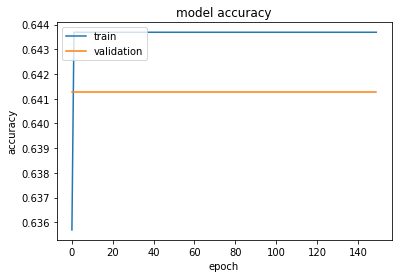

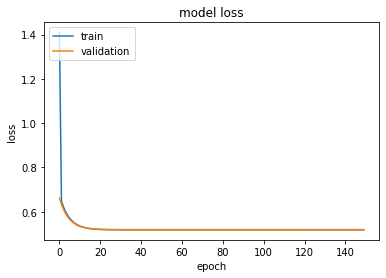

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

16/16 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.6640
Accuracy: 66.40


### Solution: Task - 3

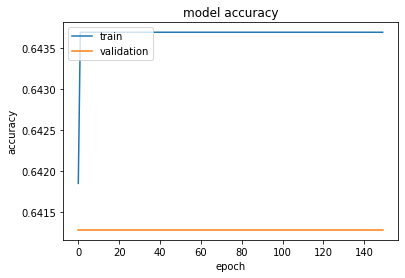

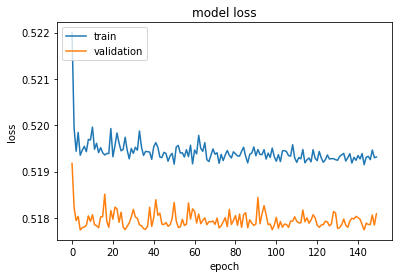

16/16 [==============================] - 0s 2ms/step - loss: 0.5055 - accuracy: 0.6640
Accuracy: 66.40


In [ ]:
# Codes for Task 3
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='tanh'))
model.add(Dense(60, activation='tanh'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

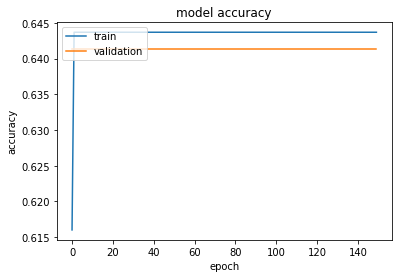

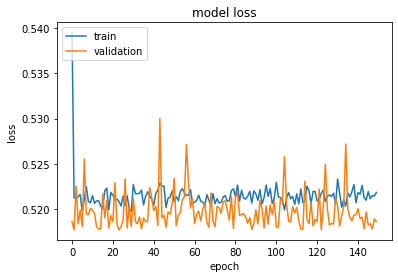

16/16 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.6640
Accuracy: 66.40


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

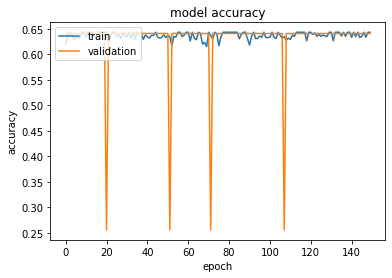

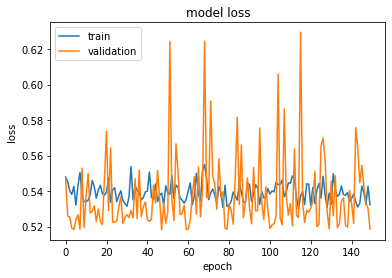

16/16 [==============================] - 0s 5ms/step - loss: 0.5070 - accuracy: 0.6640
Accuracy: 66.40


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

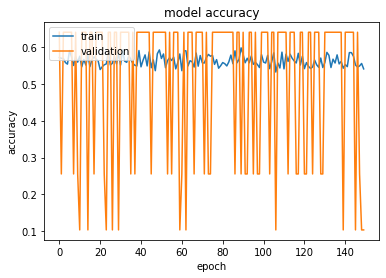

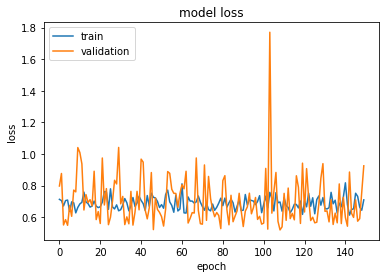

16/16 [==============================] - 0s 2ms/step - loss: 0.8917 - accuracy: 0.1041
Accuracy: 10.41


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

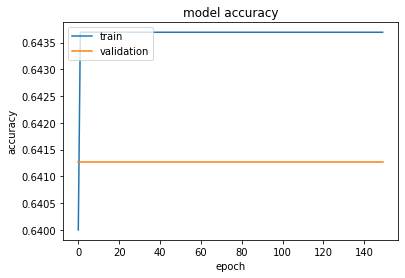

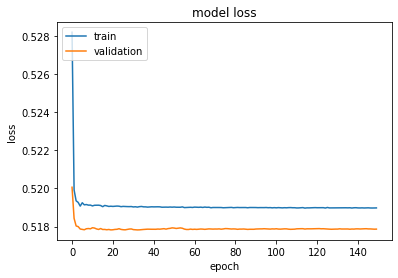

16/16 [==============================] - 0s 2ms/step - loss: 0.5052 - accuracy: 0.6640
Accuracy: 66.40


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adagrad(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

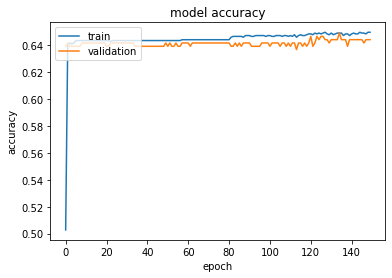

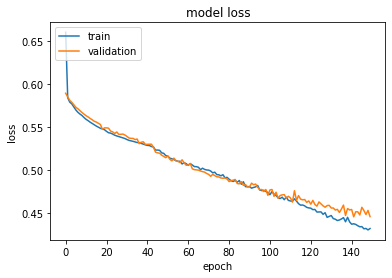

16/16 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.6582
Accuracy: 65.82


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(12, activation='tanh'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adadelta(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

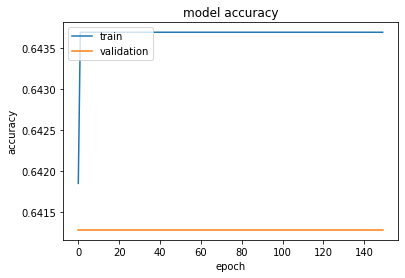

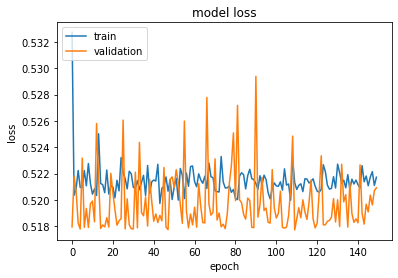

16/16 [==============================] - 0s 2ms/step - loss: 0.5068 - accuracy: 0.6640
Accuracy: 66.40


In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(200, input_shape=(676,), activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(6, activation='tanh'))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=150, batch_size=10, verbose=0)
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))